In [49]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')


In [50]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import os
os.chdir("/content/drive/MyDrive/othayaproject")
!ls



Maternity_Mortality_Data_modified.xlsx	Othaya_MortalityData_Two.xlsx
Maternity_Mortality_Data.xlsx		Othaya_SubCounty_MortalityData.csv


In [52]:
data= pd.read_excel("/content/drive/MyDrive/othayaproject/Maternity_Mortality_Data_modified.xlsx")
data.tail()

,County,Sub County,MFL Code,Patient/Client number,Sex,Age =(F2/12),Age Unit,Age(years),UCOD code,Primary diagnosis,Date of Death,Mode of discharge,Diagnosis_reduced
1186,Nyeri,Othaya,10922,4/27/2023,Female,38,Years,38.0,JB20.0,Spontaneous vertex delivery,2023-04-18,Alive,1
1187,Nyeri,Othaya,10922,2023-04-05 00:00:00,Female,30,Years,30.0,JB20.0,Spontaneous vertex delivery,2023-05-24,Alive,1
1188,Nyeri,Othaya,10922,3/27/2023,Female,27,Years,27.0,JB20.0,Spontaneous vertex delivery,2023-03-18,Alive,1
1189,Nyeri,Othaya,10922,3/26/2023,Female,23,Years,23.0,JB20.0,Spontaneous vertex delivery,2023-03-17,Alive,1
1190,Nyeri,Othaya,10922,2023-01-01 00:00:00,Female,32,Years,32.0,JB20.0,Spontaneous vertex delivery,2024-01-01,Alive,1


In [53]:
data.isnull().sum()

,0
County,0
Sub County,0
MFL Code,0
Patient/Client number,0
Sex,0
Age =(F2/12),0
Age Unit,0
Age(years),0
UCOD code,0
Primary diagnosis,0


In [54]:
data_with_missing = data[data.isnull().any(axis=1)]
data.dropna(inplace=True)


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   County                 1191 non-null   object        
 1   Sub County             1191 non-null   object        
 2   MFL Code               1191 non-null   int64         
 3   Patient/Client number  1191 non-null   object        
 4   Sex                    1191 non-null   object        
 5   Age =(F2/12)           1191 non-null   int64         
 6   Age Unit               1191 non-null   object        
 7   Age(years)             1191 non-null   float64       
 8    UCOD code             1191 non-null   object        
 9   Primary diagnosis      1191 non-null   object        
 10  Date of Death          1191 non-null   datetime64[ns]
 11  Mode of discharge      1191 non-null   object        
 12  Diagnosis_reduced      1191 non-null   int64         
dtypes: 

In [56]:
data.columns

Index(['County', 'Sub County', 'MFL Code ', 'Patient/Client number', 'Sex',
       'Age =(F2/12)', 'Age Unit', 'Age(years)', ' UCOD code',
       'Primary diagnosis', 'Date of Death', 'Mode of discharge',
       'Diagnosis_reduced'],
      dtype='object')

In [57]:
data.columns = data.columns.str.strip()
data = data.drop(['MFL Code', 'Age =(F2/12)', 'Date of Death'], axis=1)
display(data.head())

,County,Sub County,Patient/Client number,Sex,Age Unit,Age(years),UCOD code,Primary diagnosis,Mode of discharge,Diagnosis_reduced
0,Nyeri,Othaya,52023-06-036,Female,Years,20.0,JB20.0,Spontaneous vertex delivery,Alive,1
1,Nyeri,Othaya,224-10-030,Female,Years,22.0,JB20.0/QA46.0,Single live birth/Spontaneous vertex delivery,Alive,2
2,Nyeri,Othaya,224-09-016,Female,Years,21.0,JB20.0,Spontaneous vertex delivery,Alive,1
3,Nyeri,Othaya,203-07-042,Female,Years,21.0,JB20.0,Spontaneous vertex delivery,Alive,1
4,Nyeri,Othaya,2024-9-043,Female,Years,17.0,JB20.0,Spontaneous vertex delivery,Alive,1


In [58]:
display(data.describe())

,Age(years),Diagnosis_reduced
count,1191.000000,1191.000000
mean,27.452491,1.604534
std,6.734282,1.012002
min,2.916667,1.000000
25%,22.000000,1.000000
50%,26.000000,1.000000
75%,32.000000,2.000000
max,52.000000,5.000000


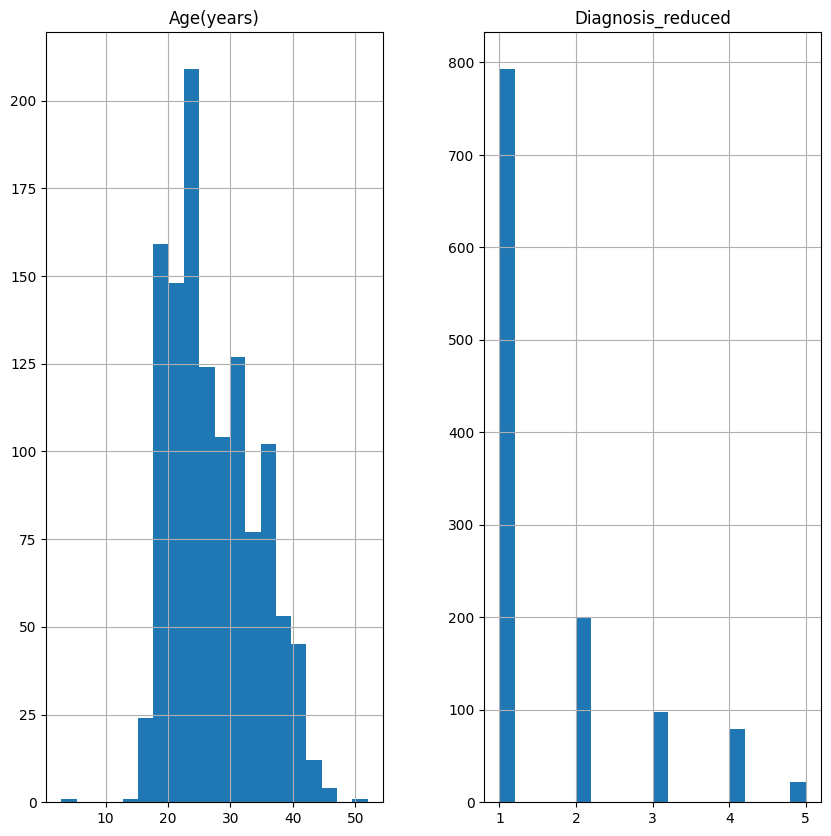

In [59]:
data.hist(bins=20, figsize=(10,10))
plt.show()

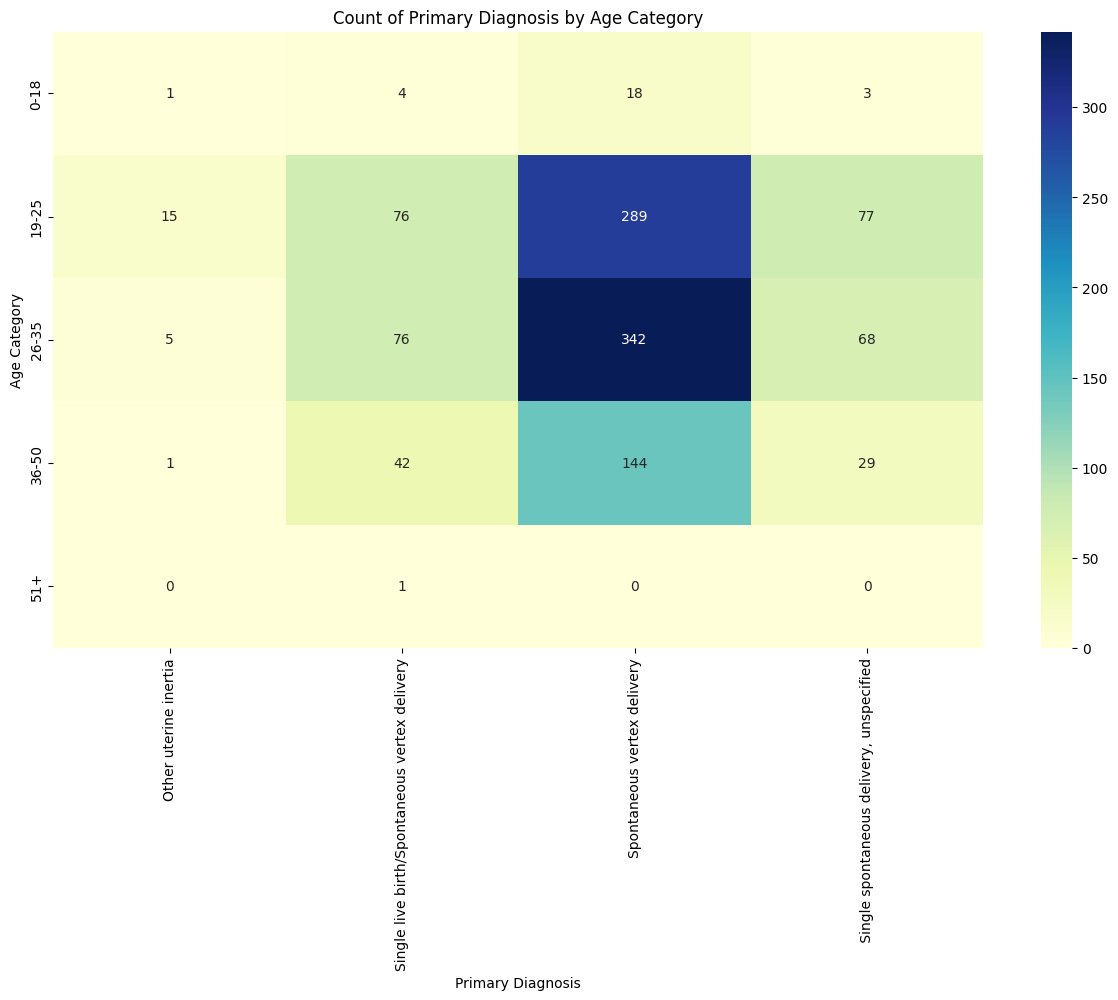

In [60]:
# Create age categories
bins = [0, 18, 25, 35, 50, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51+']
data['Age Category'] = pd.cut(data['Age(years)'], bins=bins, labels=labels, right=False)

# Create a crosstab of Age Category and Primary diagnosis
heatmap_data_category = pd.crosstab(data['Age Category'], data['Primary diagnosis'])

# Create the heatmap
plt.figure(figsize=(15, 8)) # Adjust figure size as needed
sns.heatmap(heatmap_data_category, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Count of Primary Diagnosis by Age Category')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Age Category')
plt.xticks(rotation=90)
plt.show()

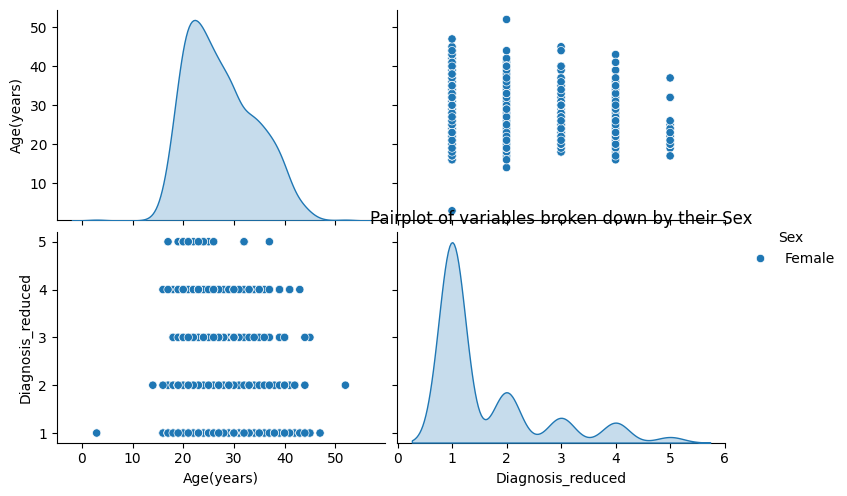

In [61]:
# Generate the pairplot with 'Sex' as the hue
sns.pairplot(data, hue='Sex', aspect=1.5)
# Add a title to the plot
plt.title('Pairplot of variables broken down by their Sex')
# Show the plot
plt.show()

In [62]:
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define categorical and numerical columns
categorical_cols = ['Primary diagnosis', 'Mode of discharge']
numerical_cols = ['Age(years)']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standard scaling for numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encoding for categorical columns
    ]
)

In [63]:
data.columns = data.columns.str.strip()

In [64]:
# Create a pipeline with preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [65]:
# Fit the pipeline to the data and transform it
data_processed = pipeline.fit_transform(data)

# Define the range of clusters to test
cluster_range = range(1, 11)  # Testing from 1 to 10 clusters

# List to store WCSS values
wcss = []

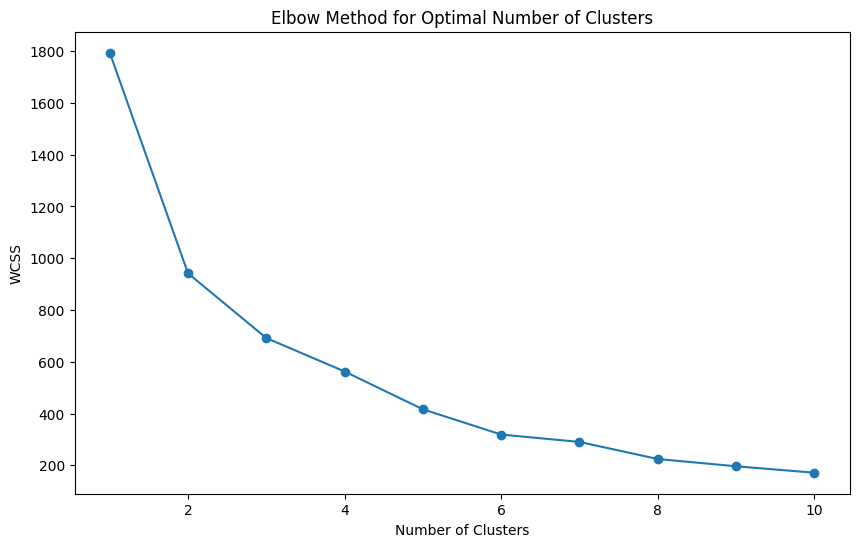

In [66]:
# Loop over the range of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_processed)  # Fit KMeans to the preprocessed data
    wcss.append(kmeans.inertia_)  # WCSS is the inertia_ attribute

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [67]:
# Fit KMeans with the optimal number of clusters (example with 3 clusters)
optimal_clusters = 5  # You can choose the optimal number based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_processed)  # Add cluster labels to the original DataFrame

# Show the first few rows of the DataFrame with cluster labels
print(data.head())

  County Sub County Patient/Client number     Sex Age Unit  Age(years)  \
0  Nyeri     Othaya          52023-06-036  Female    Years        20.0   
1  Nyeri     Othaya            224-10-030  Female    Years        22.0   
2  Nyeri     Othaya            224-09-016  Female    Years        21.0   
3  Nyeri     Othaya            203-07-042  Female    Years        21.0   
4  Nyeri     Othaya            2024-9-043  Female    Years        17.0   

       UCOD code                              Primary diagnosis  \
0         JB20.0                    Spontaneous vertex delivery   
1  JB20.0/QA46.0  Single live birth/Spontaneous vertex delivery   
2         JB20.0                    Spontaneous vertex delivery   
3         JB20.0                    Spontaneous vertex delivery   
4         JB20.0                    Spontaneous vertex delivery   

  Mode of discharge  Diagnosis_reduced Age Category  Cluster  
0             Alive                  1        19-25        1  
1             Alive       

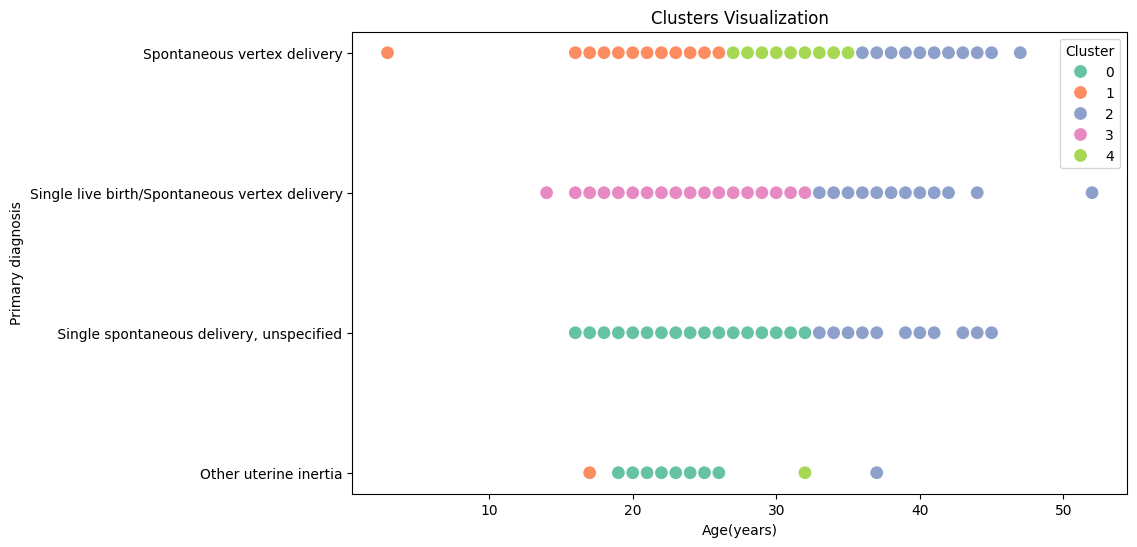

In [68]:
# Optionally, visualize clusters for selected features (e.g., 'weight' vs 'height')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age(years)'], y=data['Primary diagnosis'], hue=data['Cluster'], palette='Set2', s=100)
plt.xlabel('Age(years)')
plt.ylabel('Primary diagnosis')
plt.title('Clusters Visualization')
plt.legend(title='Cluster')
plt.show()

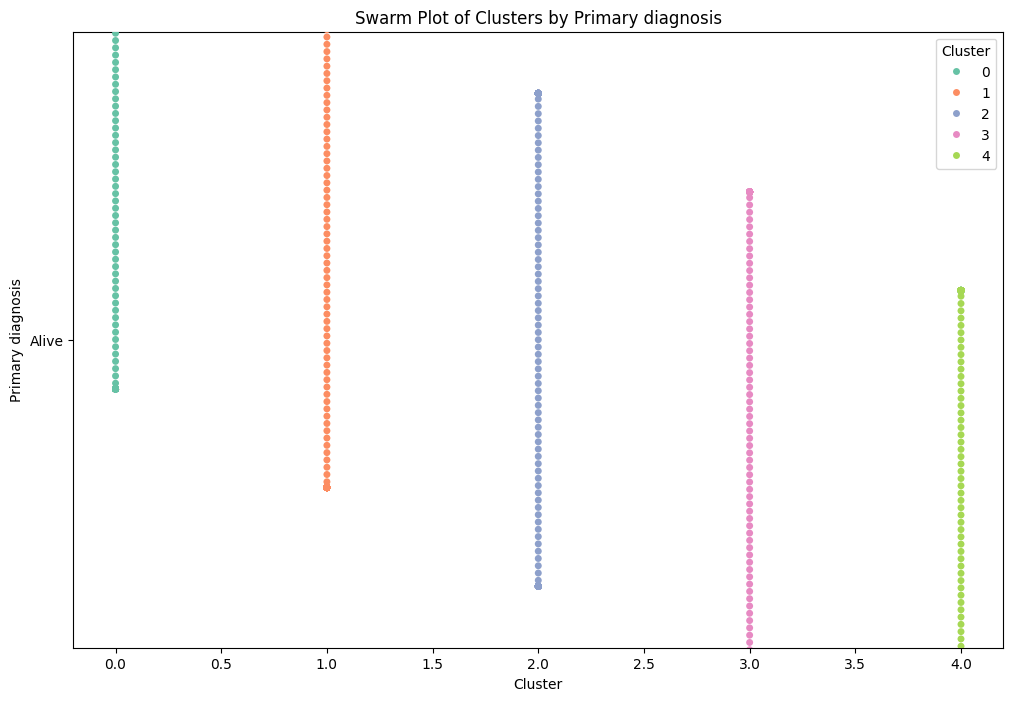

In [69]:
# Create a swarm plot to visualize clusters -collects data and tries to put them together
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Cluster', y='Mode of discharge', data=data, palette='Set2', hue='Cluster', dodge=True)
plt.xlabel('Cluster')
plt.ylabel('Primary diagnosis')
plt.title('Swarm Plot of Clusters by Primary diagnosis')
plt.legend(title='Cluster')
plt.show()


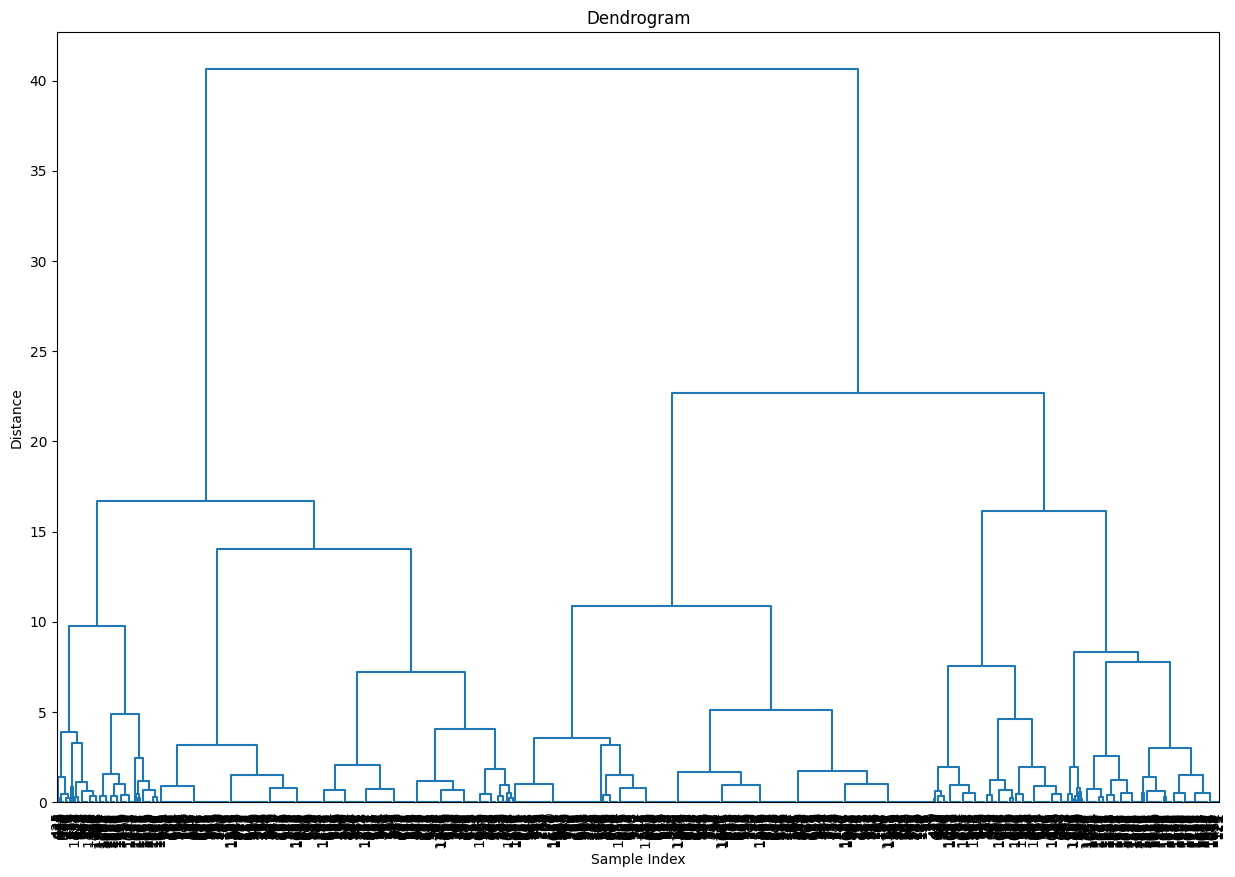

In [70]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(data_processed, method='ward')

# Create the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           labels=data.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=0)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

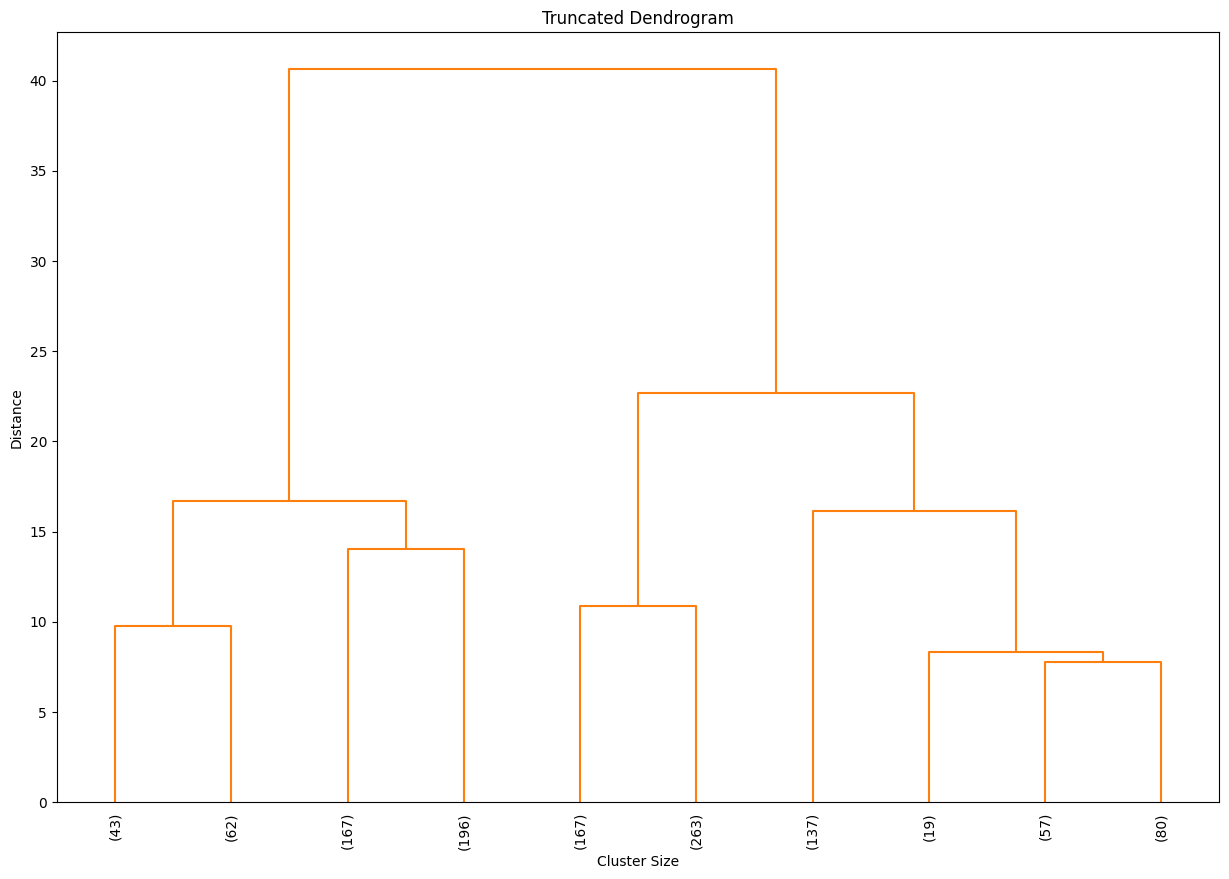

In [71]:
import scipy.cluster.hierarchy as sch

# Compute the linkage matrix
linkage_matrix = linkage(data_processed, method='ward')

# Create the dendrogram with truncated tree
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           truncate_mode='lastp',  # Truncate the tree at the last p merged clusters
           p=10,  # Number of clusters to display (adjust p to the desired number)
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=100)
plt.title('Truncated Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

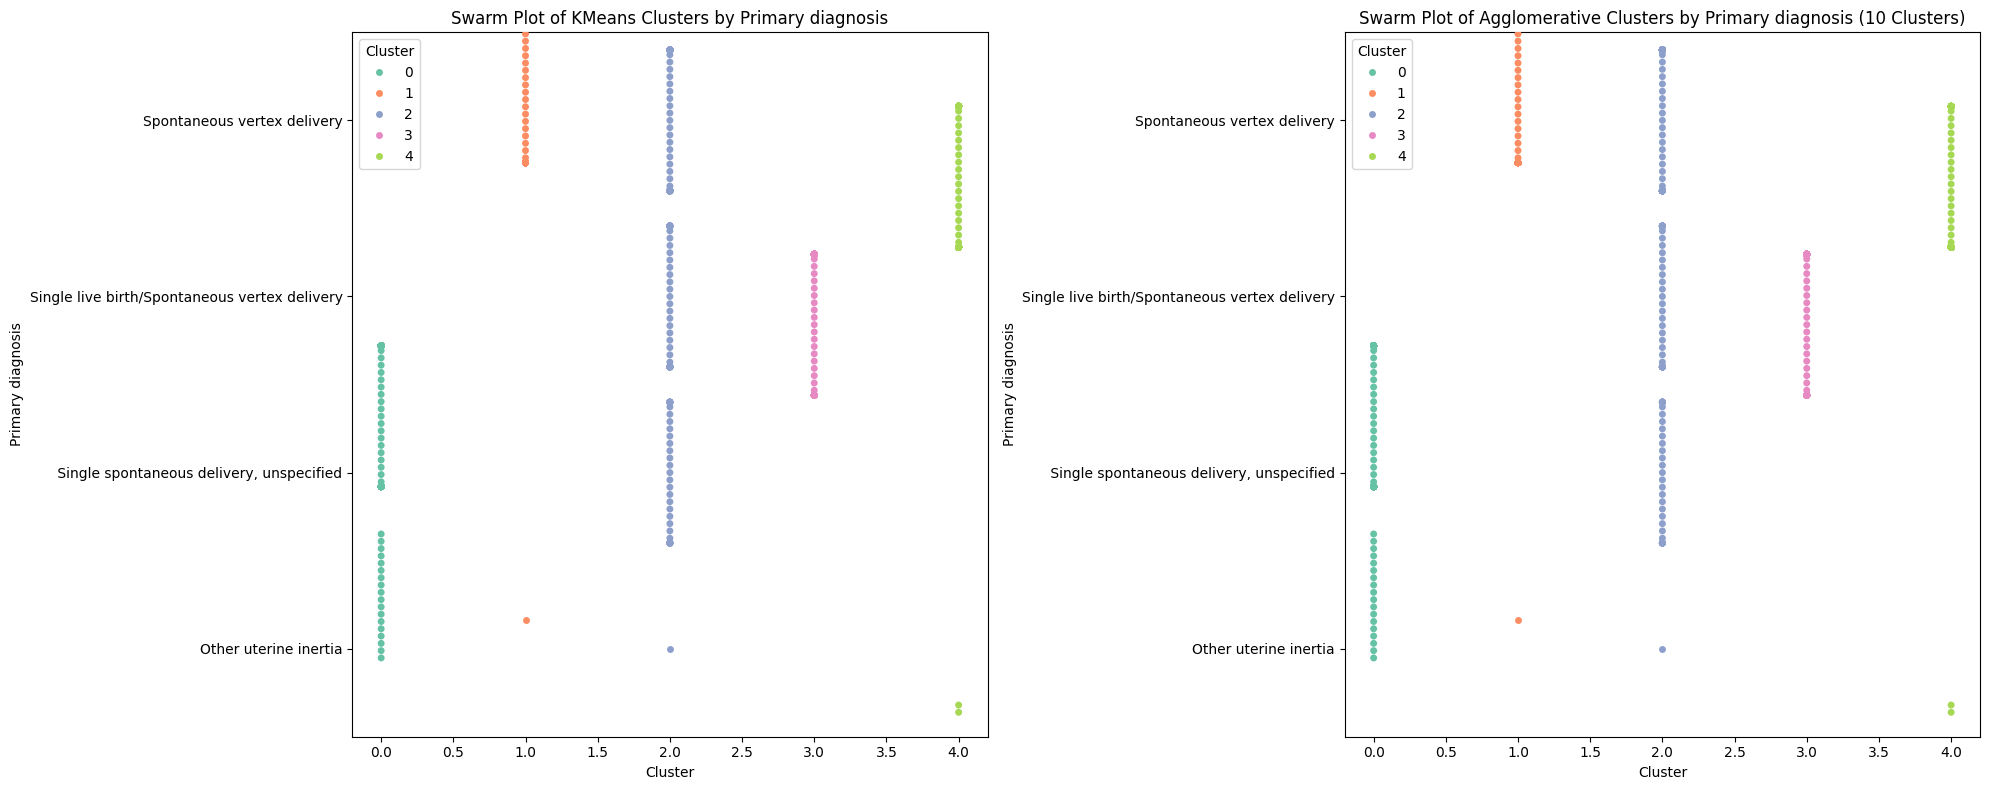

In [72]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Swarm plot for KMeans clustering
sns.swarmplot(x='Cluster', y='Primary diagnosis', data=data, palette='Set2', hue='Cluster', dodge=True, ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Primary diagnosis')
axes[0].set_title('Swarm Plot of KMeans Clusters by Primary diagnosis')
axes[0].legend(title='Cluster')

# Swarm plot for Agglomerative clustering
sns.swarmplot(x='Cluster', y='Primary diagnosis', data=data, palette='Set2', hue='Cluster', dodge=True, ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Primary diagnosis')
axes[1].set_title(f'Swarm Plot of Agglomerative Clusters by Primary diagnosis ({n_clusters} Clusters)')
axes[1].legend(title='Cluster')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Cluster', y='Primary diagnosis', data=data, palette='Set2', hue='Cluster', dodge=True)
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Primary diagnosis')
plt.title('Swarm Plot of DBSCAN Clusters by Weight')
plt.legend(title='DBSCAN Cluster')
plt.show()